In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("Train.csv") 

In [3]:
# Check column names
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['Product', 'Product_Brand', 'Item_Category', 'Subcategory_1',
       'Subcategory_2', 'Item_Rating', 'Date', 'Selling_Price'],
      dtype='object')


In [4]:
# Rename columns if needed
df.rename(columns={'Selling_Price': 'Price'}, inplace=True)

In [5]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())


Missing values in each column:
Product            0
Product_Brand      0
Item_Category      0
Subcategory_1      0
Subcategory_2      0
Item_Rating        0
Date             809
Price              0
dtype: int64


In [7]:
# Convert numeric columns to appropriate types
df['Price'] = df['Price'].astype(float)
df['Item_Rating'] = pd.to_numeric(df['Item_Rating'], errors='coerce')

In [8]:
# Descriptive statistics
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())


Summary Statistics for Numeric Columns:
       Item_Rating                           Date         Price
count  2451.000000                           1642   2451.000000
mean      3.078335  2016-05-29 14:48:22.801461760   2447.947776
min       1.000000            2012-01-12 00:00:00     33.000000
25%       2.000000            2014-04-07 12:00:00    371.000000
50%       3.100000            2016-06-08 12:00:00    596.000000
75%       4.100000            2018-05-03 00:00:00   1194.500000
max       5.000000            2020-12-06 00:00:00  70784.000000
std       1.187362                            NaN   6734.982434


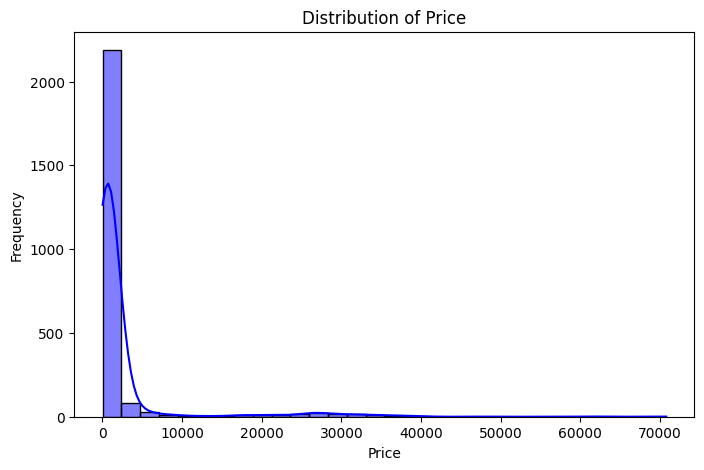

In [9]:
# Distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

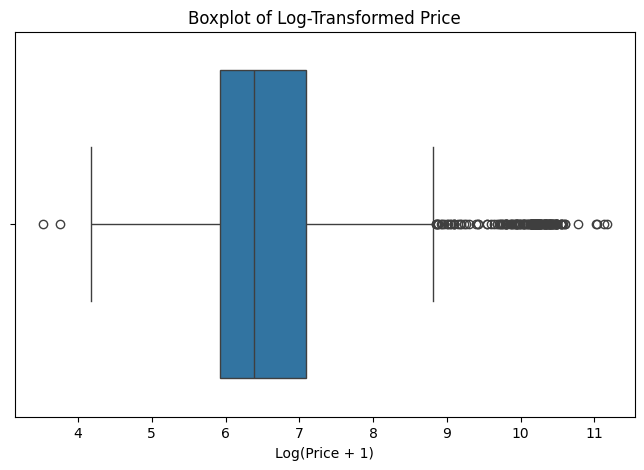

In [25]:
# Apply log transformation to the Price column (adding 1 to avoid log(0))
df['Log_Price'] = np.log1p(df['Price'])

# Boxplot for detecting outliers (log-transformed)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Log_Price'])
plt.title("Boxplot of Log-Transformed Price")
plt.xlabel("Log(Price + 1)")
plt.show()

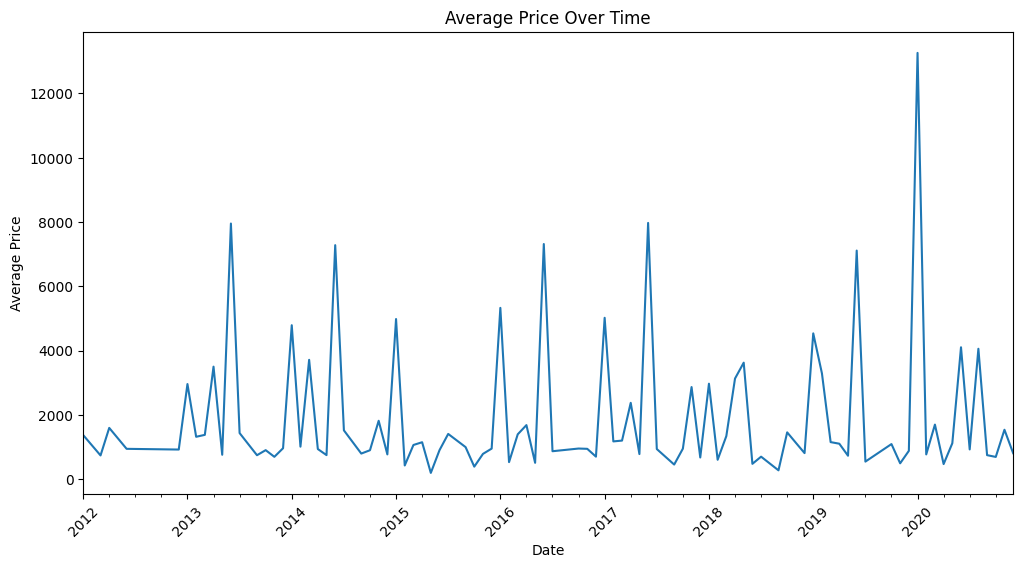

In [11]:
# Price trends over time
plt.figure(figsize=(12, 6))
df.groupby(df['Date'].dt.to_period('M'))['Price'].mean().plot()
plt.title("Average Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

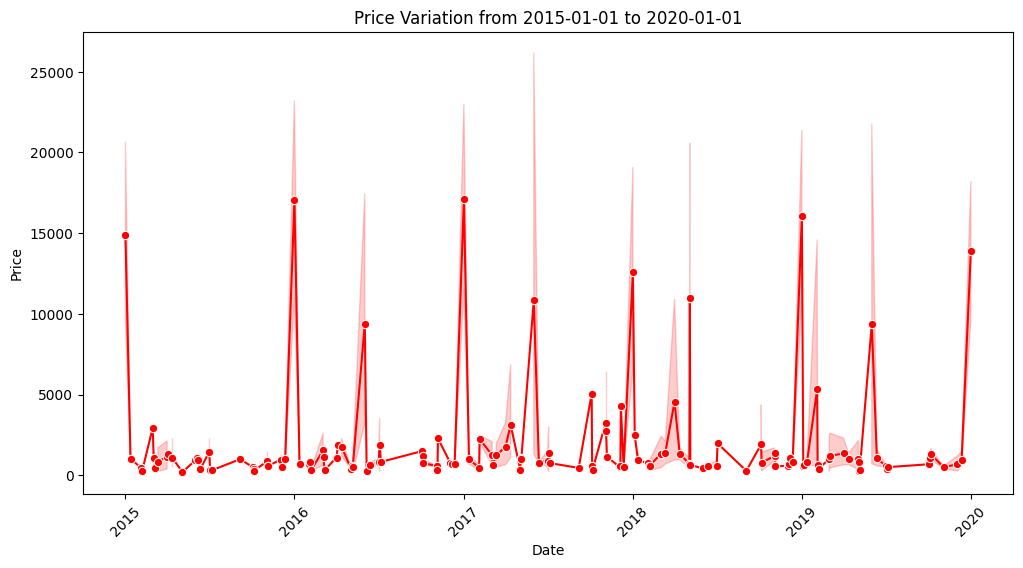

In [12]:
# Price variation within specific date ranges
start_date = '2015-01-01'
end_date = '2020-01-01'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df[mask], x='Date', y='Price', marker='o', color='red')
plt.title(f"Price Variation from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

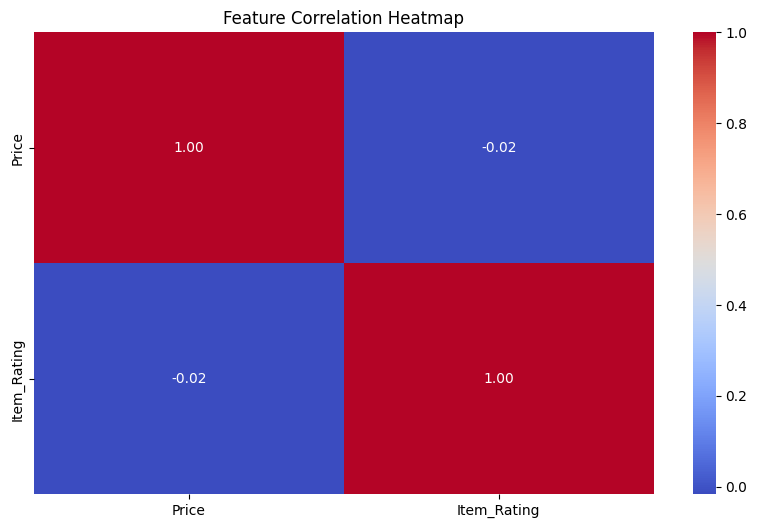

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price', 'Item_Rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
# Top 10 most expensive products
top_expensive = df[['Product', 'Price']].sort_values(by='Price', ascending=False).head(10)
print("\nTop 10 Most Expensive Products:")
print(top_expensive)


Top 10 Most Expensive Products:
      Product    Price
1018   P-3089  70784.0
1363   P-1340  68393.0
2354   P-1339  61791.0
1916   P-3086  60833.0
933    P-3081  47773.0
545    P-5713  40173.0
547   P-10727  39991.0
2167   P-9012  39201.0
1192   P-5741  38806.0
1667   P-5731  38282.0


In [19]:
# Get the top 10 item categories by count
top_10_categories = df['Item_Category'].value_counts().nlargest(10).index

# Filter the dataset for only top 10 categories
df_top_categories = df[df['Item_Category'].isin(top_10_categories)]

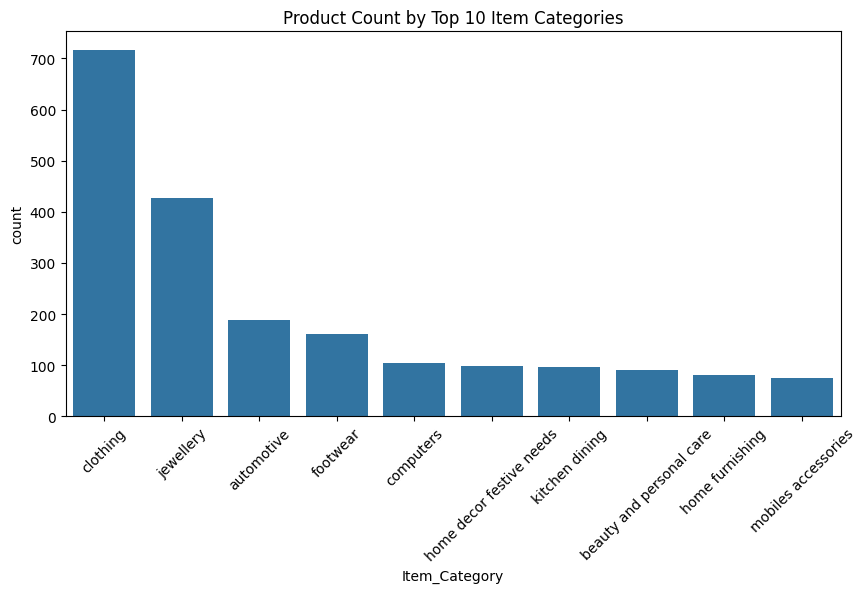

In [23]:
# Count of products in the top 10 categories
plt.figure(figsize=(10, 5))
sns.countplot(data=df_top_categories, x='Item_Category', order=top_10_categories)
plt.xticks(rotation=45)
plt.title("Product Count by Top 10 Item Categories")
plt.show()

/tmp/ipykernel_8462/1861182526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories['Log_Price'] = np.log1p(df_top_categories['Price'])


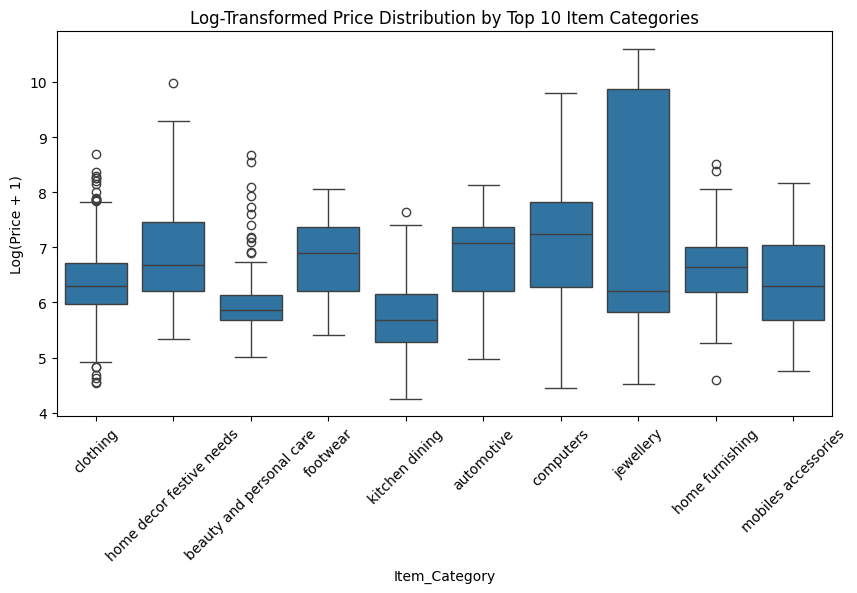

In [24]:
# Apply log transformation to the Price column (adding 1 to avoid log(0))
df_top_categories['Log_Price'] = np.log1p(df_top_categories['Price'])

# Price distribution with log transformation
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_top_categories, x='Item_Category', y='Log_Price')
plt.xticks(rotation=45)
plt.title("Log-Transformed Price Distribution by Top 10 Item Categories")
plt.ylabel("Log(Price + 1)")
plt.show()

In [17]:
# Check the number of unique brands
print("\nUnique brands:", df['Product_Brand'].nunique())

# Top 5 brands with the highest average price
top_brands = df.groupby('Product_Brand')['Price'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Brands with Highest Average Price:")
print(top_brands)


Unique brands: 1009

Top 5 Brands with Highest Average Price:
Product_Brand
B-222     65092.0
B-793     49253.0
B-2824    39991.0
B-2564    30778.0
B-1020    30186.0
Name: Price, dtype: float64


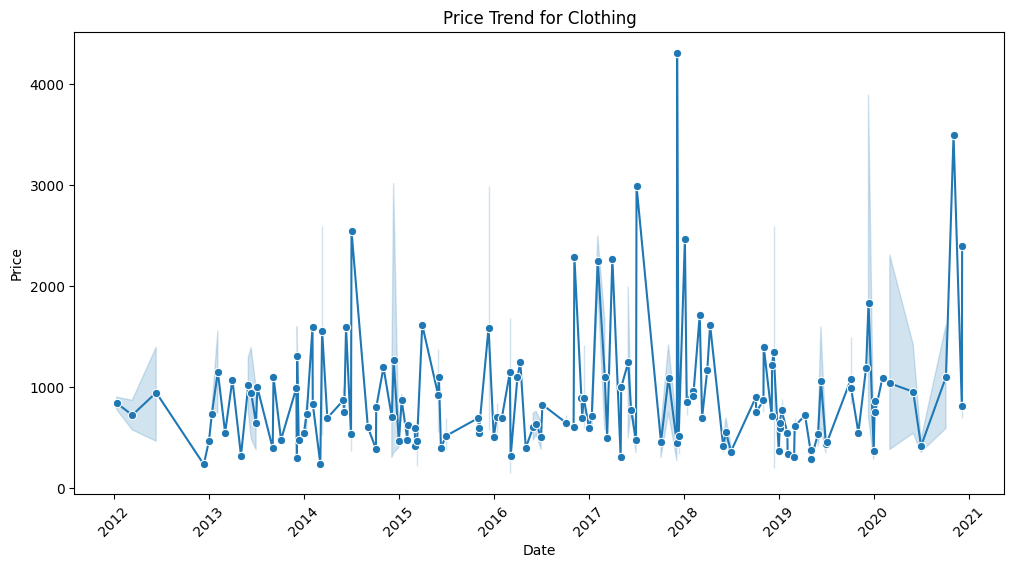

In [18]:
# Price trend for a specific category (e.g., "clothing")
category = 'clothing'
df_category = df[df['Item_Category'].str.contains(category, case=False, na=False)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_category, x='Date', y='Price', marker='o')
plt.title(f"Price Trend for {category.capitalize()}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()